# Clustering de documents

## Imports

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\janvi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
data_path = "../data/camille_crise_economique_depression_economique_année 30/"

## Choisir une décennie

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [4]:
files = [f for f in sorted(os.listdir(data_path))]

In [5]:
# Exemple de fichiers
files[:5]

['KB_JB427_1929-03-01_01-00001.txt',
 'KB_JB427_1929-03-02_01-00002.txt',
 'KB_JB427_1929-03-16_01-00002.txt',
 'KB_JB427_1929-05-22_01-00003.txt',
 'KB_JB427_1929-06-11_01-00003.txt']

In [6]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [7]:
# Exemple de textes
texts[0][:400]

'fftn Ve ndredi \\- j mars 1929 Ejfttua J,s louruaus da l\'A I llitl 11: P^, a e-*aa-Herjea-Poti^or4W. Bruxelle. *j. ...ini-lliwi . ... «X3.NV IJaiu 0 *\' •» ,,,,t **. Abunn" . «V3.WI 30 centimes le numéro jLS-clitJiori. * 40™ année N°60 {^Ajt.plUQB. 1*11 br» BmieU.l. tejoaWKMKnrTje. IOVJ Luiea. 68.00 « muis.83.00;3 mois. 19.00 "l Ua an. I 10 "■•; 6 m. 60 fr.; S ai. 30 (r. 0; a\'uieaiu conventions post'

## Vectoriser les documents à l'aide de TF-IDF

In [8]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [9]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [10]:
tfidf_vectors = vectorizer.fit_transform(texts)

In [11]:
# Détail de la matrice
tfidf_vectors

<3700x4215 sparse matrix of type '<class 'numpy.float64'>'
	with 3234024 stored elements in Compressed Sparse Row format>

### Imprimer le vecteur tf-IDF du premier document

In [12]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

sucre          0.565578
employés       0.195334
caisse         0.194387
morale         0.155318
vandervelde    0.147951
                 ...   
84             0.000000
fondateur      0.000000
fondation      0.000000
fondée         0.000000
#              0.000000
Length: 4215, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [13]:
cosine([1, 2, 3], [1, 2, 3])

0

In [14]:
cosine([1, 2, 3], [1, 2, 2])

0.02004211298777725

In [15]:
cosine([1, 2, 3], [2, 2, 2])

0.07417990022744858

### Tests sur nos documents

In [16]:
tfidf_array = tfidf_vectors.toarray()

In [17]:
# Vecteur du document 0
tfidf_array[0]

array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.03030993])

In [18]:
# Vecteur du document 1
tfidf_array[1]

array([0.01551314, 0.01628337, 0.        , ..., 0.08046577, 0.02106819,
       0.01680938])

In [19]:
cosine(tfidf_array[0], tfidf_array[1])

0.7917500742560604

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [20]:
N_CLUSTERS = 4

### Instancier le modèle K-Means et ses arguments

In [21]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [22]:
clusters = km_model.fit_predict(tfidf_vectors)

In [23]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [24]:
pprint(dict(clustering))

{0: ['KB_JB427_1938-06-01_01-00005.txt',
     'KB_JB838_1929-01-22_01-00002.txt',
     'KB_JB838_1929-02-22_01-00001.txt',
     'KB_JB838_1929-04-02_01-00002.txt',
     'KB_JB838_1929-05-17_01-00002.txt',
     'KB_JB838_1929-06-01_01-00001.txt',
     'KB_JB838_1929-07-01_01-00001.txt',
     'KB_JB838_1929-07-10_01-00003.txt',
     'KB_JB838_1929-07-22_01-00002.txt',
     'KB_JB838_1929-09-15_01-00003.txt',
     'KB_JB838_1929-12-02_01-00002.txt',
     'KB_JB838_1929-12-07_01-00002.txt',
     'KB_JB838_1929-12-13_01-00001.txt',
     'KB_JB838_1929-12-20_01-00002.txt',
     'KB_JB838_1930-01-05_01-00001.txt',
     'KB_JB838_1930-01-10_01-00001.txt',
     'KB_JB838_1930-01-27_01-00002.txt',
     'KB_JB838_1930-02-06_01-00002.txt',
     'KB_JB838_1930-02-25_01-00001.txt',
     'KB_JB838_1930-02-26_01-00002.txt',
     'KB_JB838_1930-03-01_01-00001.txt',
     'KB_JB838_1930-03-14_01-00001.txt',
     'KB_JB838_1930-04-17_01-00001.txt',
     'KB_JB838_1930-05-06_01-00001.txt',
     'KB_JB838_1

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [25]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [26]:
reduced_vectors[:10]

array([[-0.12369306,  0.0917277 ],
       [-0.13556424,  0.10156451],
       [-0.10974698,  0.09382518],
       [-0.11999062, -0.00490913],
       [-0.11802235,  0.03581044],
       [-0.19419247,  0.05967643],
       [-0.08590061,  0.09102884],
       [-0.06265499,  0.03794267],
       [ 0.09035415,  0.29913131],
       [-0.15206054,  0.06782209]])

### Générer le plot

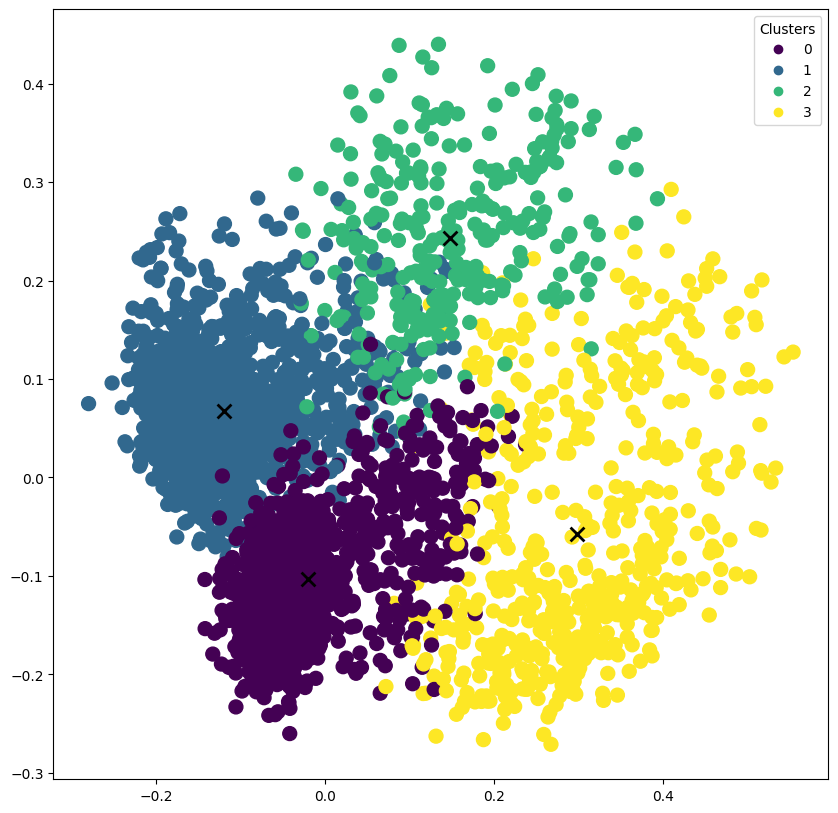

In [27]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")